# Cats & Dogs Classification

By Seif Eldin Mohamed Mostafa


Importing Necessary Libraries

In [84]:

import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import glob


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report


Loading The Data

In [85]:
# Define the path where your audio files are stored
audio_files_path = 'C:/Users/seife/OneDrive/Desktop/Speech Recognition/Data/cats_dogs'

# Get the list of all audio files in the directory and its subdirectories
audio_files = glob.glob(os.path.join(audio_files_path, '**', '*.wav'), recursive=True)

# Labels based on file names
labels = ['dog' if 'dog_barking' in file else 'cat' for file in audio_files]

# Create a DataFrame with file paths and labels
data_df = pd.DataFrame({'path': audio_files, 'label': labels})
data_df.head()


,path,label
0,C:/Users/seife/OneDrive/Desktop/Speech Recogni...,cat
1,C:/Users/seife/OneDrive/Desktop/Speech Recogni...,cat
2,C:/Users/seife/OneDrive/Desktop/Speech Recogni...,cat
3,C:/Users/seife/OneDrive/Desktop/Speech Recogni...,cat
4,C:/Users/seife/OneDrive/Desktop/Speech Recogni...,cat


In [86]:
# Check the unique labels and their counts
print(data_df['label'].value_counts())


label
cat    164
dog    113
Name: count, dtype: int64


# Visualization

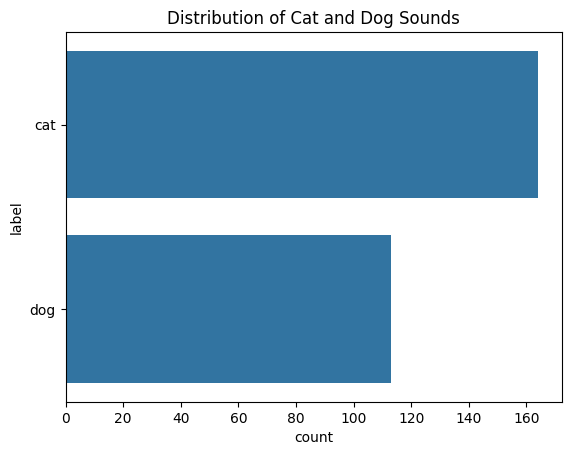

In [87]:
# Visualizing the distribution of classes
import seaborn as sns

sns.countplot(data_df['label'])
plt.title('Distribution of Cat and Dog Sounds')
plt.show()


Waveform Visalization

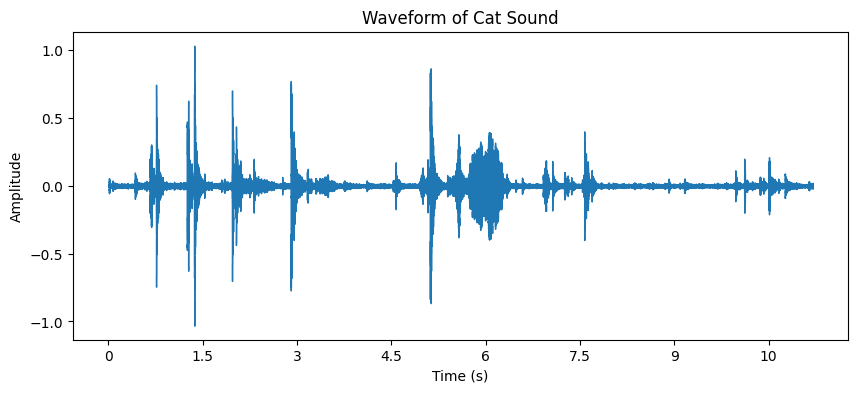

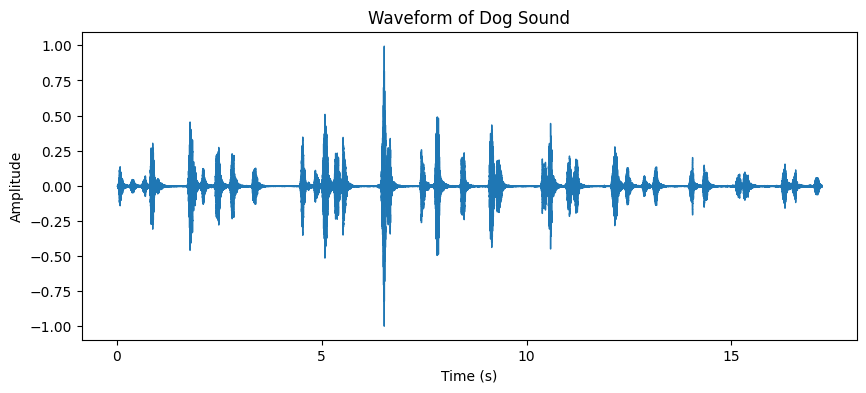

In [88]:
import librosa.display

# Function to plot waveform
def plot_waveform(file_path, title):
    audio, sample_rate = librosa.load(file_path)
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio, sr=sample_rate)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Plot waveforms for a cat and a dog sample
cat_sample = data_df[data_df['label'] == 'cat']['path'].iloc[0]
dog_sample = data_df[data_df['label'] == 'dog']['path'].iloc[0]

plot_waveform(cat_sample, 'Waveform of Cat Sound')
plot_waveform(dog_sample, 'Waveform of Dog Sound')


Spectogram

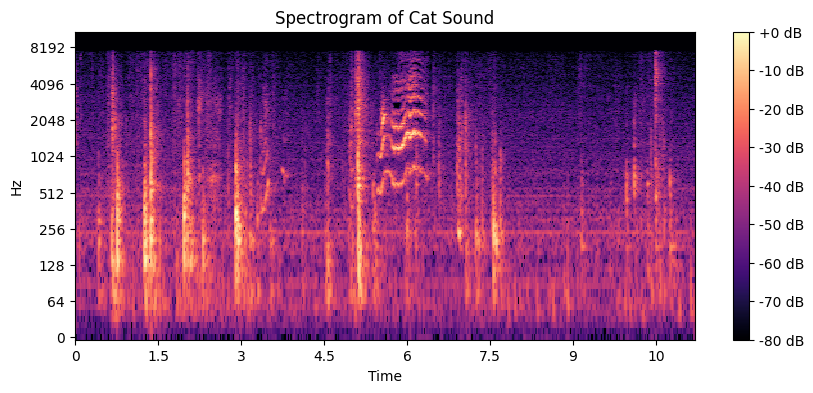

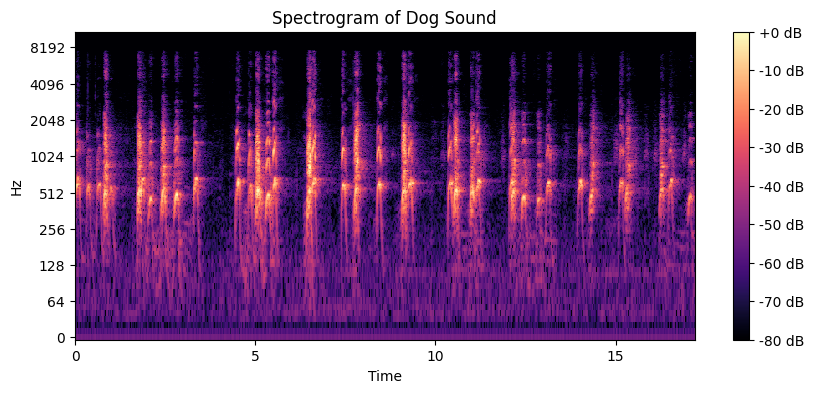

In [89]:
# Function to plot a spectrogram
def plot_spectrogram(file_path, title):
    audio, sample_rate = librosa.load(file_path)
    spectrogram = np.abs(librosa.stft(audio))
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max),
                             sr=sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

# Plot spectrograms for a cat and a dog sample
plot_spectrogram(cat_sample, 'Spectrogram of Cat Sound')
plot_spectrogram(dog_sample, 'Spectrogram of Dog Sound')


Mel Spectogram

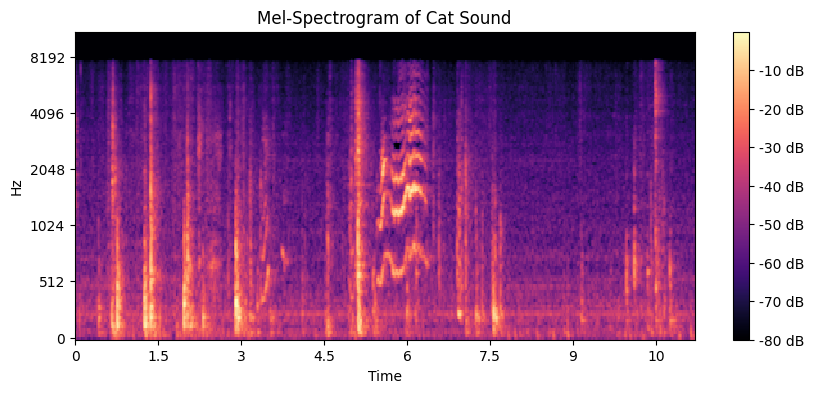

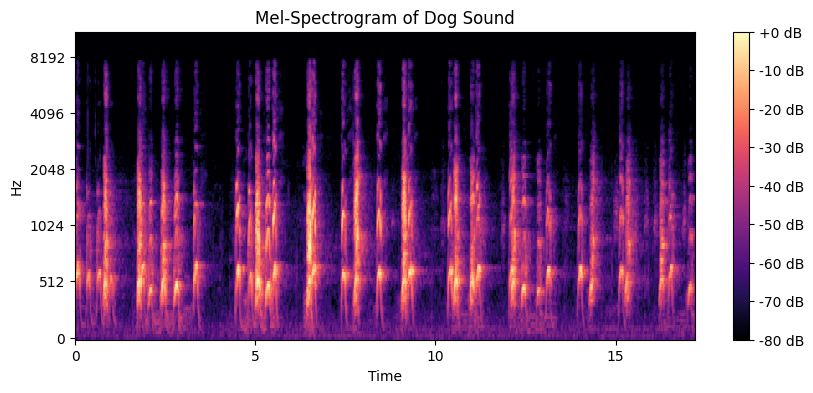

In [90]:
# Function to plot a mel-spectrogram
def plot_melspectrogram(file_path, title):
    audio, sample_rate = librosa.load(file_path)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_mels=128)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spectrogram_db, sr=sample_rate, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

# Plot mel-spectrograms for a cat and a dog sample
plot_melspectrogram(cat_sample, 'Mel-Spectrogram of Cat Sound')
plot_melspectrogram(dog_sample, 'Mel-Spectrogram of Dog Sound')


# Feature Extraction

In [91]:
# Function to extract features from audio files
def extract_features(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')  # Change to res_type='scipy' if resampy isn't installed
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    return mfccs_scaled


# Extract features for each audio file and create a feature matrix
features = np.array([extract_features(file) for file in data_df['path']])
labels = np.array(data_df['label'])

# Encode the labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)


# Data Augmentation

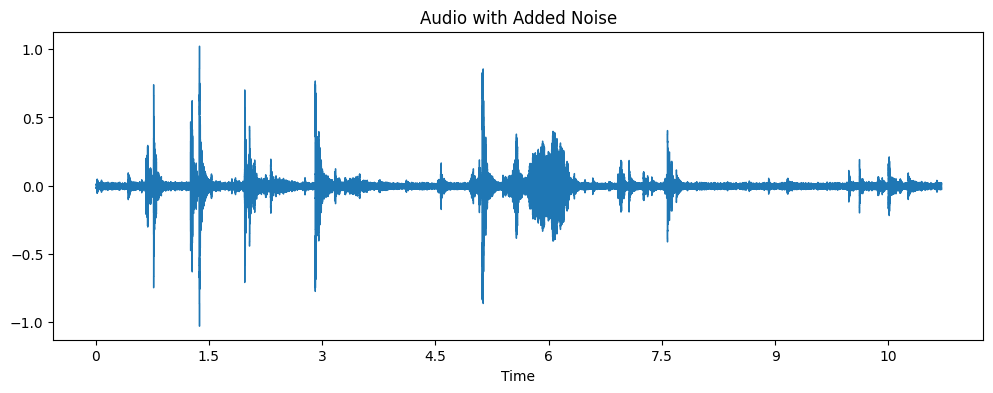

In [92]:
# Example of data augmentation by adding noise
def add_noise(data):
    noise = np.random.randn(len(data))
    data_noise = data + 0.005 * noise
    return data_noise

# Augment a single file and display the effect
sample_file = audio_files[0]
audio, sample_rate = librosa.load(sample_file, res_type='kaiser_fast')
audio_with_noise = add_noise(audio)

plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio_with_noise, sr=sample_rate)
plt.title('Audio with Added Noise')
plt.show()


# Neural Network Model
Using TensorFlow

In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))

# Second hidden layer
model.add(Dense(units=64, activation='relu'))

# Third hidden layer
model.add(Dense(units=32, activation='relu'))

# Output layer
model.add(Dense(units=1, activation='softmax'))  

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")


c:\Users\seife\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,617 (61.00 KB)

 Trainable params: 15,617 (61.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


c:\Users\seife\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4187 - loss: 3.7194 - val_accuracy: 0.4889 - val_loss: 0.8492
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3981 - loss: 0.6351 - val_accuracy: 0.4889 - val_loss: 0.9687
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3399 - loss: 0.4983 - val_accuracy: 0.4889 - val_loss: 0.8506
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4033 - loss: 0.3472 - val_accuracy: 0.4889 - val_loss: 0.7025
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3815 - loss: 0.4727 - val_accuracy: 0.4889 - val_loss: 0.6519
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3650 - loss: 0.2520 - val_accuracy: 0.4889 - val_loss: 0.6635
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3731 - loss: 0.2737 - val_accuracy: 0.4889 - val_loss: 0.5768
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3978 - loss: 0.2399 - val_accuracy: 0.4889 - val_loss: 0.6059
Epoch 9/50
6/6 

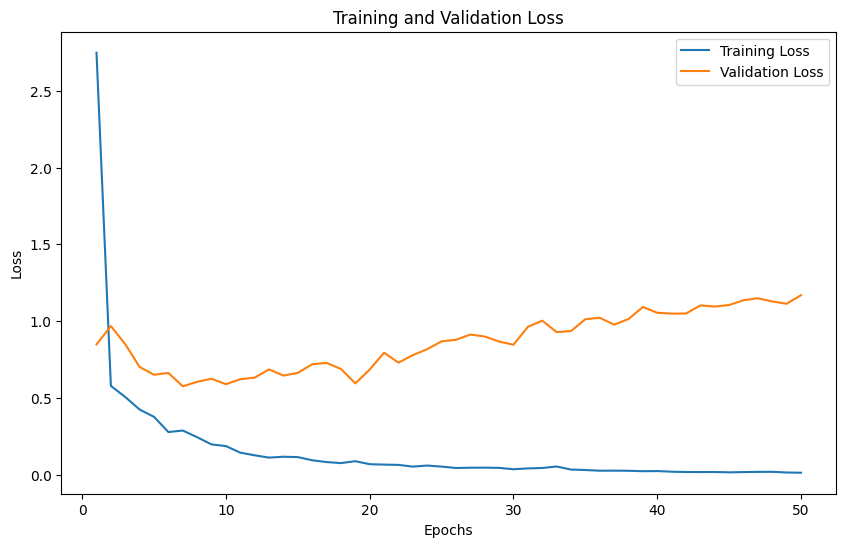

In [94]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have the history object
epochs = range(1, len(history.history['accuracy']) + 1)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot training & validation loss values
ax.plot(epochs, history.history['loss'], label='Training Loss')
ax.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax.set_title('Training and Validation Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()

plt.show()


Evaluation

Classification Report:
              precision    recall  f1-score   support

         cat       0.97      0.94      0.95        32
         dog       0.92      0.96      0.94        24

    accuracy                           0.95        56
   macro avg       0.94      0.95      0.95        56
weighted avg       0.95      0.95      0.95        56

Confusion Matrix:


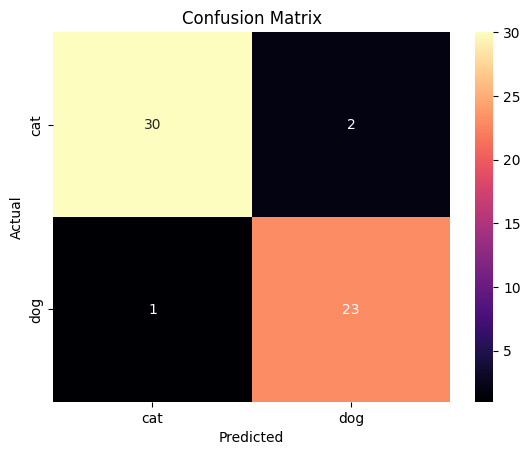

In [95]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma', xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# Thank You
# Yours Seif :)